<a href="https://colab.research.google.com/github/mckang6113875/AP_Test_OPEN/blob/main/TEMP_Undistortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

Cloning into 'AP_Test_OPEN'...
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (276/276), done.
remote: Compressing objects: 100% (276/276), done.
remote: Total 276 (delta 192), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (276/276), 52.30 MiB | 4.73 MiB/s, done.
Resolving deltas: 100% (192/192), done.


(720, 1140, 3)


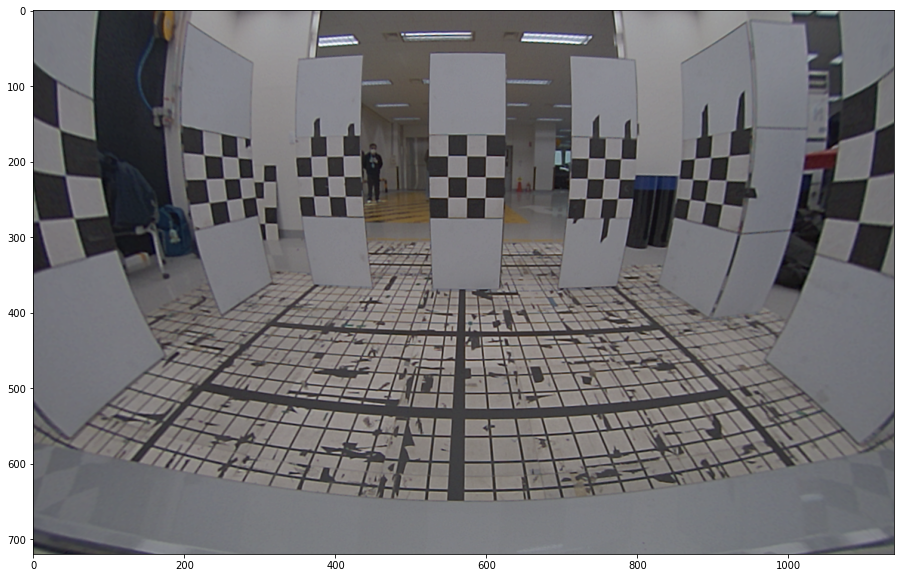

In [104]:
import cv2
import matplotlib.pyplot as plt
#img = cv2.imread('/content/AP_Test_OPEN/ChessBoard_3.jpg')
#img = cv2.imread('/content/AP_Test_OPEN/ViewMode_origin.bmp')
img = cv2.imread('/content/AP_Test_OPEN/ViewMode_R.bmp')

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(25, 10))
plt.imshow(img2)
print(img2.shape)


In [86]:
import numpy as np
import cv2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
wc = 9
hc = 6

objp = np.zeros((wc*hc,3), np.float32)
objp[:, :2] = np.mgrid[0:wc, 0:hc].T.reshape(-1,2)

objpoints = []
imgpoints = []

_img = cv2.resize(img2, dsize = (640, 480), interpolation = cv2.INTER_AREA)
gray = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(gray, (wc, hc), None)
print(ret)

if ret == True:
  objpoints.append(objp)
  corners2 = cv2.cornerSubPix(gray, corners, (10,10), (-1, -1), criteria)
  imgpoints.append(corners2)

  img = cv2.drawChessboardCorners(_img, (wc, hc), corners2, ret)

  ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
  h, w = img.shape[:2]
  newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1)

  dst = cv2.undistort(img, mtx, dist)
  dst2= cv2.undistort(img, mtx, dist, None, newcameramtx)

  fig = plt.figure(figsize=(25, 10))
  plt.subplot(131)
  plt.imshow(img2)
  plt.subplot(132)
  plt.imshow(dst)
  plt.subplot(133)
  plt.imshow(dst2)

False


True


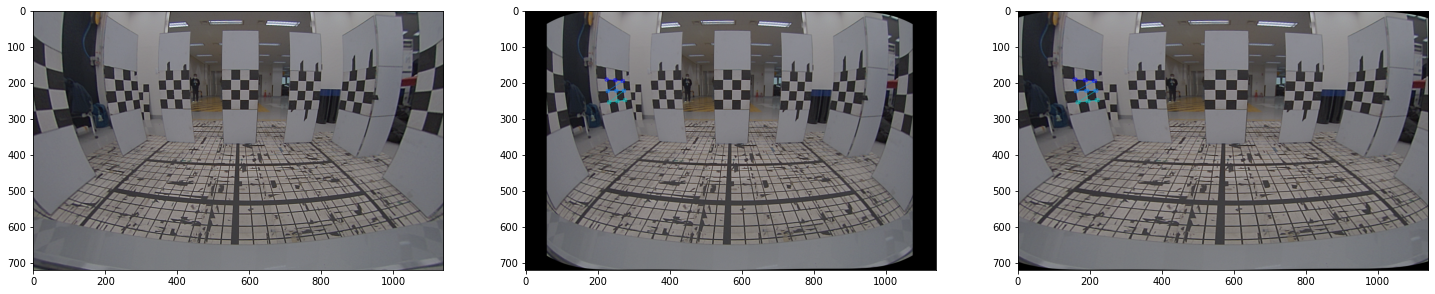

In [108]:
import numpy as np
import cv2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
wc = 3
hc = 3

objp = np.zeros((wc*hc,3), np.float32)
objp[:, :2] = np.mgrid[0:wc, 0:hc].T.reshape(-1,2)

objpoints = []
imgpoints = []

#_img = cv2.resize(img2, dsize = (640, 480), interpolation = cv2.INTER_AREA)
_img = cv2.resize(img2, dsize = (1140, 720), interpolation = cv2.INTER_AREA)
gray = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(gray, (wc, hc), None)
print(ret)

if ret == True:
  objpoints.append(objp)
  corners2 = cv2.cornerSubPix(gray, corners, (10,10), (-1, -1), criteria)
  imgpoints.append(corners2)

  img = cv2.drawChessboardCorners(_img, (wc, hc), corners2, ret)

  ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
  h, w = img.shape[:2]
  newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1)

  dst = cv2.undistort(img, mtx, dist)
  dst2= cv2.undistort(img, mtx, dist, None, newcameramtx)

  fig = plt.figure(figsize=(25, 10))
  plt.subplot(131)
  plt.imshow(img2)
  plt.subplot(132)
  plt.imshow(dst)
  plt.subplot(133)
  plt.imshow(dst2)

In [114]:
import numpy as np
import cv2
